# Dosis en aire en el interior del irradiador
------

## Fluencia

Calcular la fluencia en aire en el interior del irradiador

Definir las constantes que describen la geometría de irradiador

In [1]:
H = 0.16
D = 0.08

In [3]:
import matplotlib.pyplot as plt
import numpy as np

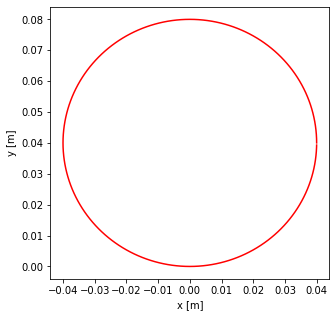

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
r = 0.04
rad_deg = np.pi/180
θv = np.arange(0,360)*rad_deg
xv = r*np.cos(θv)
yv = r*np.sin(θv)
ax.plot(xv, yv + r, 'r-')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.show()

La fuente es lineal, ocupa toda la altura del irradiador y está en contacto con la pared del irradiador en x=0, y=0.
Definir una función que nos dé el cuadrado de la distancia desde cualquier punto sobre la fuente (0, 0,  zf) a un punto (x, y, z) dentro del irradiador.

In [7]:
def r2f(zf, x, y, z):
    return x**2 + y**2 + (z-zf)**2

La fluencia desde cada elemento de la fuente en zf se reduce en $1/r2f$ en el punto (x, y, z). La fluencia total debida a toda la fuente se obtiene sumando la contribución de todos los elementos de fuente

In [16]:
# Elementos de fuente
hf = np.linspace(-0.08, 0.08, 161)
# Coordenadas de campo 
xc = np.linspace(-0.04, 0.04, 81)
yc = np.linspace(-0.04, 0.04, 81)
zc = np.linspace(-0.08, 0.08, 161)

Queremos calcular la fluencia sobre un plano que contiene un diámetro y el eje del irradiador. Este plano gira y la fluencia depende del ángulo $\theta$ entre él y el plano que contiene a la fuente y al eje del irradiador.

Para un elemento de fuente en $zf$ y un plano dentro del irradiador con coordenadas $xc, zc$ y orientado según el ángulo $\theta$, el cuadrado de las distancias de los puntos de campo al elemento de fuente serán

In [55]:
def d2f(xc, zc, zf, θ):
    return 1/((xc*np.sin(θ*rad_deg))**2 + (zc*np.cos(θ*rad_deg) + 0.0404)**2)

In [56]:
xv, zv = np.meshgrid(xc, zc)

In [61]:
def Φ(θ):
    Φ_z = np.array([d2f(xv, zv, zf, θ) for zf in hf])
    Φ_v = np.sum(Φ_z, axis=1)
    return Φ_v

In [62]:
Φ_p = np.array([Φ(θ) for θ in θv])
Φ_p = np.sum(Φ_p, axis=0)
Φ_p = Φ_p / Φ_p.max()

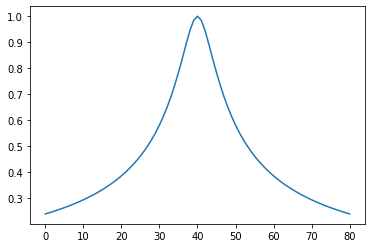

In [65]:
plt.plot(Φ_p[80, :])

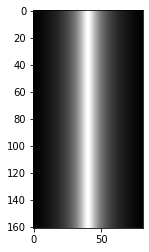

In [64]:
plt.imshow(Φ_p, cmap=plt.cm.gray)